# Text generator

## Word Generator

### Requisiti
- alfabeto
- vocabolario (regole per decidere se una parola è corretta)
- un processo di selezione casuale

### Procedura
- estrai $N$ lettere da $A$
- memorizza lettere in $W$

### Stutture dati
- $N$ = numero intero
- $A$ = collezione di caratteri
- $W$ = stringa

In [1]:
from string import ascii_lowercase
import numpy as np

In [2]:
alpha = list(ascii_lowercase)

In [3]:
alpha.append('.')
alpha.append(' ')

In [4]:
term = set(['.', ' ', '.'])

In [5]:
def generate_word(alpha, term=None):
    if term is None:
        term = {'.'}
    char = None
    output = []
    while char not in term:
        i = np.random.randint(low=0, high=len(alpha))
        char = alpha[i]
        output.append(char)
    return "".join(output)

In [6]:
stats = []
for x in range(10000):
    word = generate_word(alpha, term={'.', ' '})
    stats.append(word)

In [7]:
len(stats), stats[:3]

(10000, ['rd ', 'xgaratdybbolwzuuhiyvheaphl ', 'bhju.'])

In [8]:
c = 0
for w in stats:
    c += len(w)
mean = c / len(stats)

In [9]:
mean

13.9692

## Frequenza per word count

In [10]:
dati = {'nome': ['alfio', 'maria', 'roberto'], 'cognome': 'ferrara'}

In [11]:
for k, v in dati.items():
    print(v)
    if isinstance(v, list):
        for x in v:
            print(k, x)
    else:
        print(k, v)

['alfio', 'maria', 'roberto']
nome alfio
nome maria
nome roberto
ferrara
cognome ferrara


idx = {
    0: 10,
    1: 23,
    2: 45,
    ...
}

In [12]:
idx = {}
for word in stats:
    n = len(word)
    try:
        idx[n] += 1
    except KeyError:
        idx[n] = 1

### Grafici

In [13]:
import matplotlib.pyplot as plt

In [14]:
g = [1, 2, 3, 4, 5, 4, 2, 4, 2, 1]

In [21]:
x, h = [], []
for k, v in idx.items():
    x.append(k)
    h.append(v)

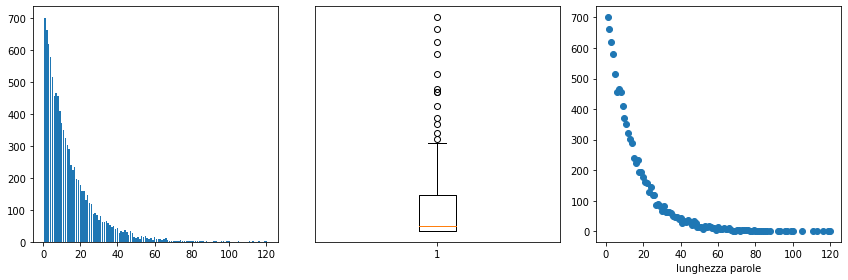

In [30]:
fig, ax = plt.subplots(figsize=(12, 4), ncols=3)
ax[0].bar(x=x, height=h)
ax[1].boxplot(h)
ax[1].get_yaxis().set_visible(False)
ax[2].scatter(x, h)
ax[2].set_xlabel('lunghezza parole')
plt.tight_layout()
plt.show()

## Pandas

## Miglioramento del processo di generazione
- lunghezza parole: parametrizzare la probabilità del carattere di terminazione sulla lunghezza reale delle parole in una lingua
- gestire la generazione di numeri casuali con distribuzioni date (no uniformità)
- abbandonare l'assunzione di indipendenza

In [32]:
stats[10]

'kqaluirrkhzngkeretdbv '